# Starter code for the Outliers Mini-Project

In [1]:
import random
import pickle

import numpy as np
import matplotlib.pyplot as plt

## Load up some practice data with outliers in it

In [2]:
with open('practice_outliers_ages.pkl', 'rb') as f:
    ages = pickle.load(f)
    
with open('practice_outliers_net_worths.pkl', 'rb') as f:
    net_worths = pickle.load(f)

- ages and net_worths need to be reshaped into 2D numpy arrays
- second argument of reshape command is a tuple of integers: `(n_rows, n_columns)`
- by convention, `n_rows` is the number of data points
- and `n_columns` is the number of features

In [3]:
from sklearn.model_selection import train_test_split

ages = np.reshape(np.array(ages), (len(ages), 1))
net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))

ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

## ↓↓↓ Your Code Goes Here ↓↓↓

Fill in a regression here!  Name the regression object `reg` so that the plotting code below works, and you can see what your regression looks like

In [40]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(ages_train,net_worths_train)

LinearRegression()

Q1

In [41]:
reg.coef_

array([[5.07793064]])

Q2

In [53]:

#pred=reg.predict(ages_test)
reg.score(ages_test,net_worths_test)

0.8782624703664672

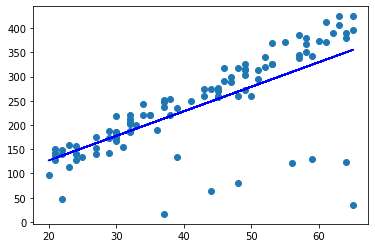

In [6]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

## Identify and remove the most outlier-y points

In [29]:
def outlier_cleaner(predictions, ages, net_worths):
    """Clean away the 10% of points that have the largest
    residual errors (difference between the prediction
    and the actual net worth).

    Return a list of tuples named cleaned_data where
    each tuple is of the form (age, net_worth, error).
    """
    cleaned_data = []
    uncleaned_data = []
    

    ### your code goes here
    i = len(ages)
    for a in range(i):
        error = net_worths[a][0]-predictions[a][0]
        uncleaned_data.append((ages[a][0], net_worths[a][0], abs(error)))
    print("number of entries before cleaning", len(uncleaned_data))
    for b in range(9):
        lagrest_error = uncleaned_data[0][2]
        i = len(uncleaned_data)
        for a in range(i):
            if lagrest_error < uncleaned_data[a][2]:
               lagrest_error = uncleaned_data[a][2]
               largest_error_number = a
        print("deleted:",uncleaned_data[largest_error_number])
        del uncleaned_data[largest_error_number]
    cleaned_data = uncleaned_data
    print("number of entries after cleaning", len(uncleaned_data))
    return cleaned_data

In [30]:
cleaned_data = []

try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlier_cleaner(predictions, ages_train, net_worths_train)
except NameError:
    print("Your regression object doesn't exist, or isn't name reg")
    print("Can't make predictions to use in identifying outliers")

number of entries before cleaning 90
deleted: (65, 34.19027438129125, 321.08523898796125)
deleted: (64, 122.70221488837397, 227.49536783743827)
deleted: (37, 16.507788679151513, 196.58566667377383)
deleted: (59, 129.10958748845152, 195.69834202015946)
deleted: (56, 121.11602327460938, 188.45811430368084)
deleted: (48, 80.9013362873476, 188.0493561434206)
deleted: (44, 64.06616829393845, 184.5728015630687)
deleted: (22, 47.70052124577958, 89.22397445554193)
deleted: (39, 134.41369498852399, 88.83562165128185)
number of entries after cleaning 81


**Only run this code if `cleaned_data` is returning data**

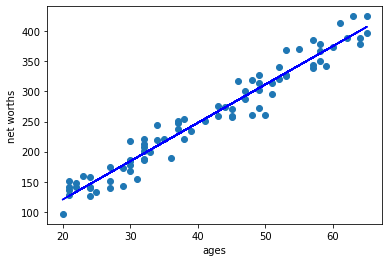

In [54]:
if cleaned_data:
    ages, net_worths, errors = zip(*cleaned_data)
    ages = np.reshape(np.array(ages), (len(ages), 1))
    net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))

    # Refit your cleaned data!

    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("you don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")

    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()
else:
    print("outlier_cleaner() is returning an empty list, no refitting to be done")

Q3

In [32]:
reg.coef_

array([[6.36859481]])

Q4

In [55]:

#pred=reg.predict(ages_test)
reg.score(ages_test,net_worths_test)

0.983189455395532

## Enron Outliers

In [56]:
import sys
import pickle
import matplotlib.pyplot

sys.path.append("../utils/")

from feature_format import feature_format, target_feature_split

read in data dictionary, convert to numpy array

In [85]:
with open('../17-final-project/final_project_dataset.pkl', 'rb') as f:
    data_dict = pickle.load(f)

features = ["salary", "bonus"]
data_dict.pop('TOTAL',0)

data = feature_format(data_dict, features)

## ↓↓↓ Your Code Goes Here ↓↓↓

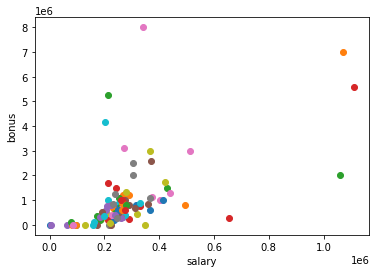

In [86]:
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [88]:
import pandas as pd
df=pd.DataFrame(data_dict)
df.head()

,METTS MARK,BAXTER JOHN C,ELLIOTT STEVEN,CORDES WILLIAM R,HANNON KEVIN P,MORDAUNT KRISTINA M,MEYER ROCKFORD G,MCMAHON JEFFREY,HAEDICKE MARK E,PIPER GREGORY F,...,SAVAGE FRANK,IZZO LAWRENCE L,TILNEY ELIZABETH A,MARTIN AMANDA K,BUY RICHARD B,GRAMM WENDY L,CAUSEY RICHARD A,TAYLOR MITCHELL S,DONAHUE JR JEFFREY M,GLISAN JR BEN F
salary,365788,267102,170941,NaN,243293,267093,NaN,370448,374125,197091,...,NaN,85274,247338,349487,330546,NaN,415189,265214,278601,274975
to_messages,807,NaN,NaN,764,1045,NaN,232,2355,4009,1238,...,NaN,496,460,1522,3523,NaN,1892,533,865,873
deferral_payments,NaN,1295738,NaN,NaN,NaN,NaN,1848227,NaN,2157527,1130036,...,NaN,NaN,NaN,85430,649584,NaN,NaN,227449,NaN,NaN
total_payments,1061827,5634343,211725,NaN,288682,628522,1848227,4099771,3859065,1737629,...,3750,1979596,399393,8407016,2355702,119292,1868758,1092663,875760,1272284
loan_advances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
for name in df.columns:
    
    if (df.loc['salary',name]>10**6)and(df.loc['bonus',name]>5*10**6):
        print(name)

LAY KENNETH L
SKILLING JEFFREY K


In [101]:
print( [name for name in df.columns if df.loc['salary', name] > 10**6 and df.loc['bonus',name] > 5*10**6])

['LAY KENNETH L', 'SKILLING JEFFREY K']
